In [28]:
import glob
import math

import xarray as xr
import xcdat as xc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def joules_to_watts(da):
    """Convert from Joules to Watts"""

    input_units = da.attrs["units"]
    input_freq = xr.infer_freq(da.indexes['time'][0:3])[0]
    assert input_freq == 'D'

    if (input_units[0] == 'M') or (input_units[0:4] == 'mega'):
        da = da * 1e6
    seconds_in_day = 60 * 60 * 24
    da = da / seconds_in_day

    return da

In [3]:
agcd_files = sorted(glob.glob('/g/data/xv83/agcd-csiro/dailyExposure/daily/dailyExposure_AGCD-CSIRO_r005_*_daily.nc'))

In [4]:
agcd_ds = xc.open_mfdataset(agcd_files)
agcd_ds = agcd_ds.sel(time=slice('1990-01-01', '2019-12-31'))

In [5]:
agcd_ds['dailyExposure']

<xarray.DataArray 'dailyExposure' (time: 10940, latitude: 679, longitude: 839)>
dask.array<getitem, shape=(10940, 679, 839), dtype=float64, chunksize=(366, 679, 839), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 112.1 112.1 112.2 112.2 ... 153.9 153.9 154.0
  * latitude   (latitude) float64 -10.05 -10.1 -10.15 ... -43.85 -43.9 -43.95
  * time       (time) object 1990-01-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    long_name:  Daily total horizontal solar exposure at surface
    units:      megajoule/meter2

In [6]:
awra_files = sorted(glob.glob('/g/data/fj8/BoM/AWRA/DATA/CLIMATE/solar_exposure_day/solar_exposure_day_*.nc'))

In [7]:
awra_ds = xc.open_mfdataset(awra_files)
awra_ds = awra_ds.sel(time=slice('1990-01-01', '2019-12-31'))

In [8]:
awra_ds['solar_exposure_day']

<xarray.DataArray 'solar_exposure_day' (time: 10957, latitude: 681,
                                        longitude: 841)>
dask.array<getitem, shape=(10957, 681, 841), dtype=float32, chunksize=(366, 681, 841), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1990-01-01 00:00:00 ... 2019-12-31 00:00:00
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Attributes:
    name:           solar_exposure_day
    units:          MJ m^-2
    standard_name:  integral_of_surface_downwelling_shortwave_flux_in_air_wrt...
    source:         Satellite-derived global exposure
    long_name:      Daily global solar radiation exposure

In [9]:
silo_files = sorted(glob.glob('/g/data/xv83/silo-csiro/radiation/daily/radiation_SILO-CSIRO_r005_*_daily.nc'))

In [10]:
silo_ds = xc.open_mfdataset(silo_files)
silo_ds = silo_ds.sel(time=slice('1990-01-01', '2019-12-31'))

In [11]:
silo_ds['radiation']

<xarray.DataArray 'radiation' (time: 10957, lat: 681, lon: 841)>
dask.array<getitem, shape=(10957, 681, 841), dtype=float32, chunksize=(366, 681, 841), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 112.0 112.0 112.1 112.2 ... 153.8 153.9 153.9 154.0
  * time     (time) object 1990-01-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    long_name:  Solar radiation - total incoming downward shortwave radiation
    units:      MJ/m2
    valid_min:  0
    valid_max:  350

In [22]:
era5_files_1990s = sorted(glob.glob('/g/data/dk7/processed/staging/users/cxh599_ua6/GlobalObs_and_Reanalysis/processed/aus0.05/ERA-5/day/rsds/rsds_ERA-5_day_aus0.05_199[0,1,2,3,4,5,6,7,8,9].nc'))
era5_files_2000s = sorted(glob.glob('/g/data/dk7/processed/staging/users/cxh599_ua6/GlobalObs_and_Reanalysis/processed/aus0.05/ERA-5/day/rsds/rsds_ERA-5_day_aus0.05_20[0,1][0,1,2,3,4,5,6,7,8,9].nc'))
era5_files = era5_files_1990s + era5_files_2000s

In [23]:
era5_ds = xc.open_mfdataset(era5_files)

In [25]:
era5_ds['rsds']

<xarray.DataArray 'rsds' (time: 10957, lat: 691, lon: 886)>
dask.array<concatenate, shape=(10957, 691, 886), dtype=float32, chunksize=(366, 691, 886), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1990-01-01 12:00:00 ... 2019-12-31 12:00:00
  * lon      (lon) float64 112.0 112.0 112.1 112.2 ... 156.1 156.2 156.2 156.2
  * lat      (lat) float64 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
Attributes:
    standard_name:  rsds
    long_name:      Surface solar radiation downwards
    units:          W m-2
    original_name:  ssrd

In [26]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}


def moving_average(x, w):
    data = np.concatenate([x, x, x])
    rolling_mean = np.convolve(data, np.ones(w), "valid") / w
    start = len(x) - math.floor(w/2)
    end = start + len(x)
        
    return rolling_mean[start:end] 


def get_point_data(city, year):
    
    lat, lon = city_lat_lon[city]
    
    point_awra = awra_ds.sel({'latitude': lat, 'longitude': lon}, method='nearest')
    point_awra = point_awra.compute()
    point_year_awra = point_awra.sel(time=point_awra['time'].dt.year == year)
    da_awra = point_year_awra['solar_exposure_day']
    da_awra = joules_to_watts(da_awra)
    
    point_agcd = agcd_ds.sel({'latitude': lat, 'longitude': lon}, method='nearest')
    point_agcd = point_agcd.compute()
    point_year_agcd = point_agcd.sel(time=point_agcd['time'].dt.year == year)
    da_agcd = point_year_agcd['dailyExposure']
    da_agcd = joules_to_watts(da_agcd)
    
    point_agcd_clim = point_agcd.temporal.climatology("dailyExposure", freq="day", weighted=True)
    point_agcd_clim = point_agcd_clim.compute()
    point_agcd_clim_smooth = moving_average(point_agcd_clim['dailyExposure'].values, 31)
    point_year_agcd_fixed = point_year_agcd['dailyExposure'].fillna(point_agcd_clim_smooth)
    da_agcd_fixed = point_year_agcd_fixed
    da_agcd_fixed = joules_to_watts(da_agcd_fixed)
    
    point_silo = silo_ds.sel({'lat': lat, 'lon': lon}, method='nearest')
    point_silo = point_silo.compute()
    point_year_silo = point_silo.sel(time=point_silo['time'].dt.year == year)
    da_silo = point_year_silo['radiation']
    da_silo = joules_to_watts(da_silo)
    
    point_era5 = era5_ds.sel({'lat': lat, 'lon': lon}, method='nearest')
    point_era5 = point_era5.compute()
    point_year_era5 = point_era5.sel(time=point_era5['time'].dt.year == year)
    da_era5 = point_year_era5['rsds']
    
    return da_awra, da_agcd, da_agcd_fixed, da_silo, da_era5

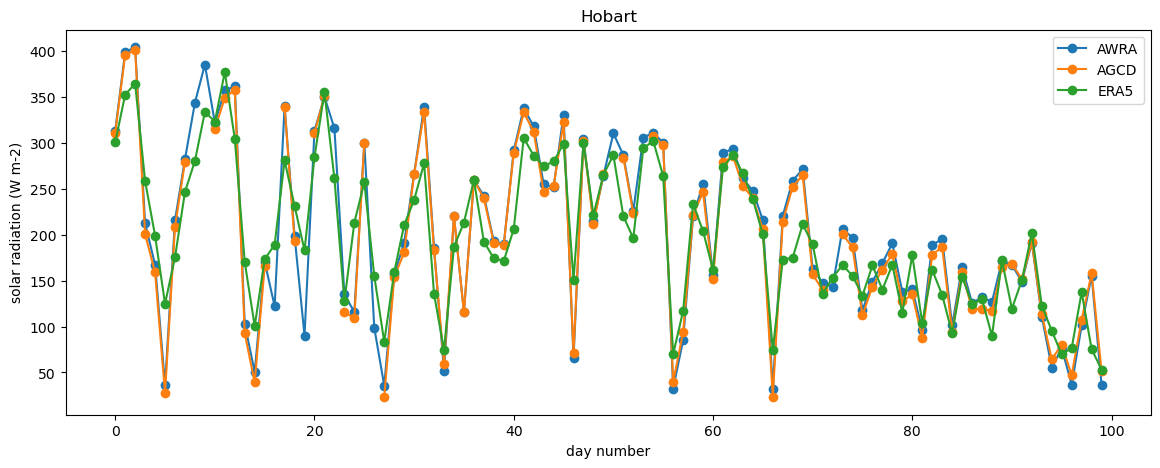

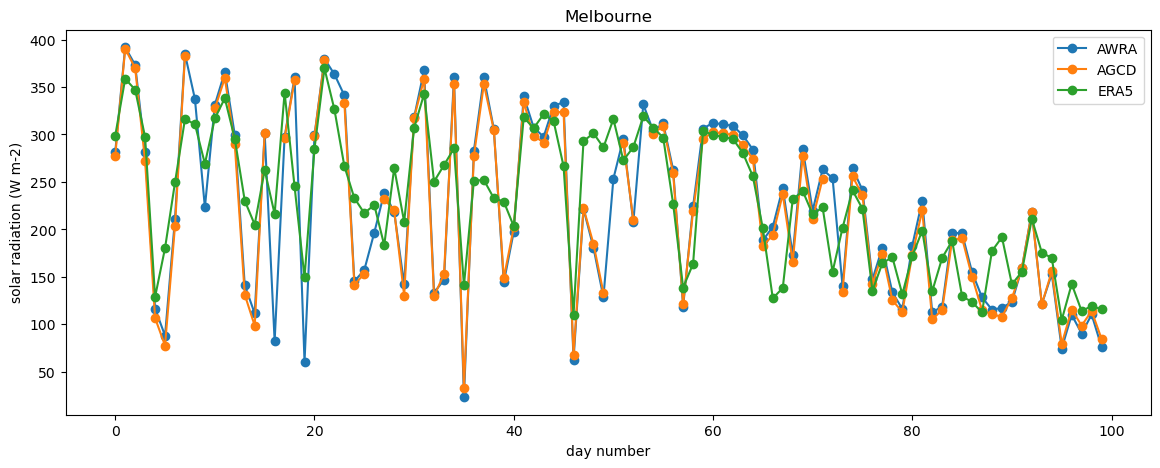

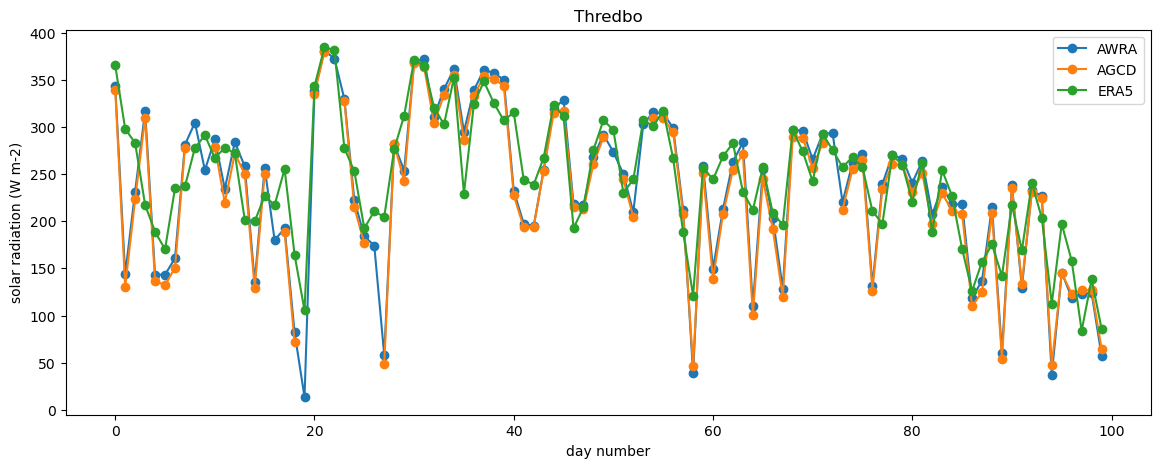

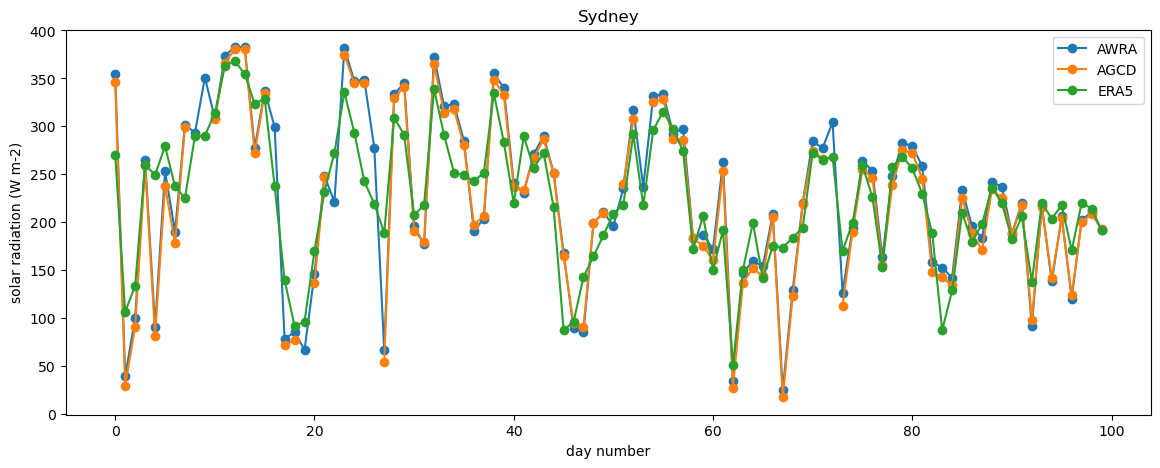

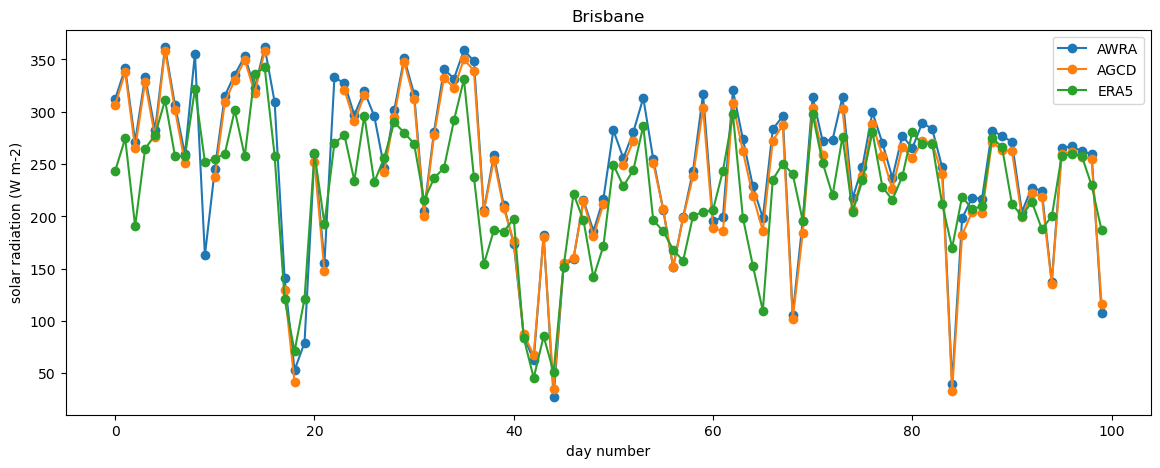

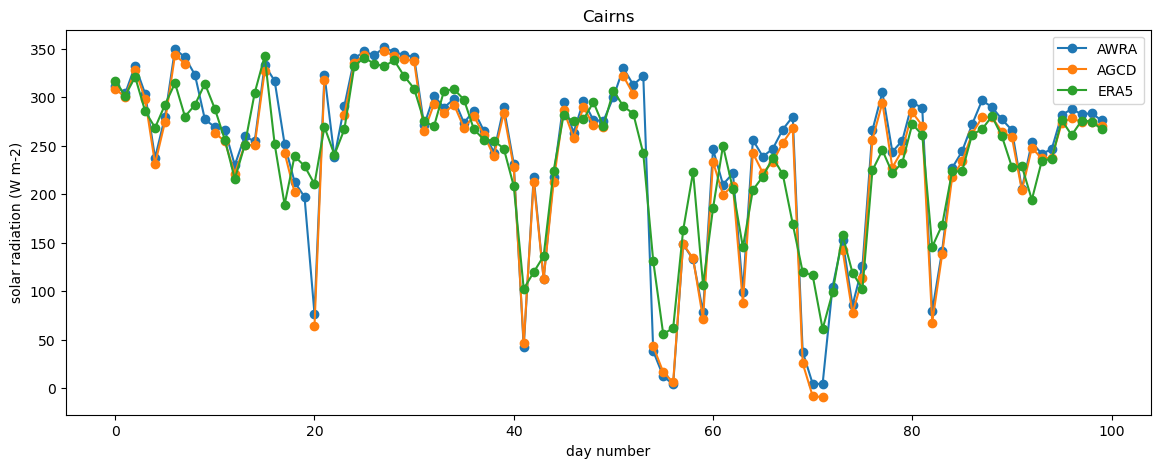

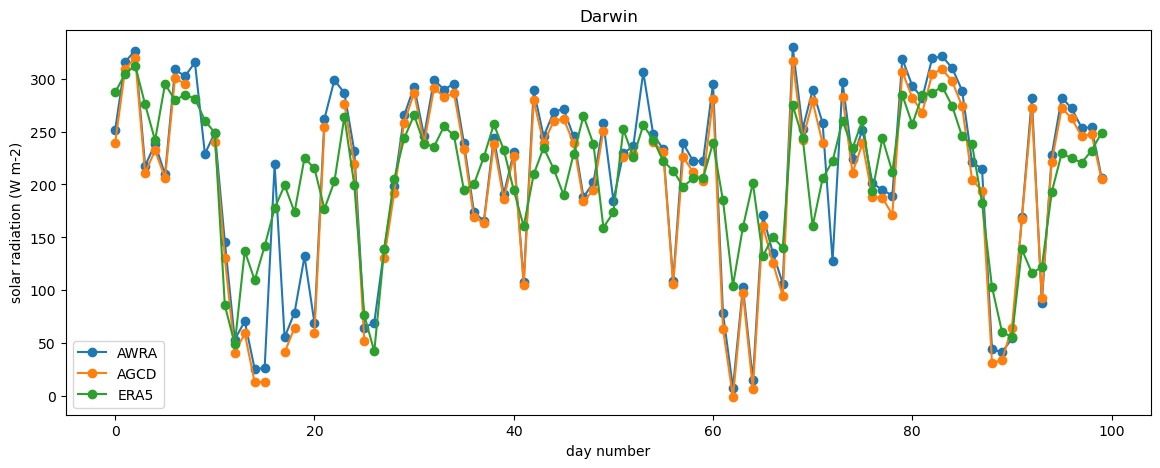

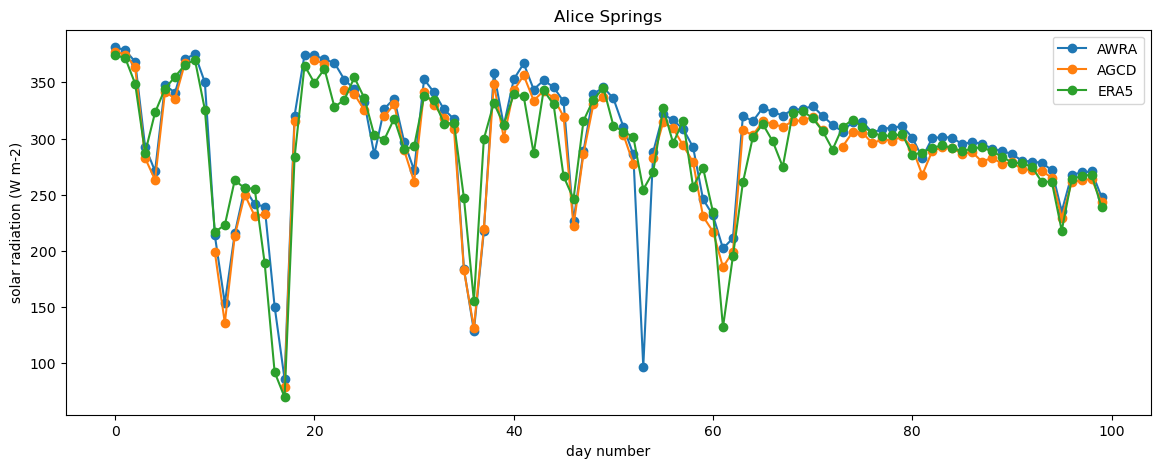

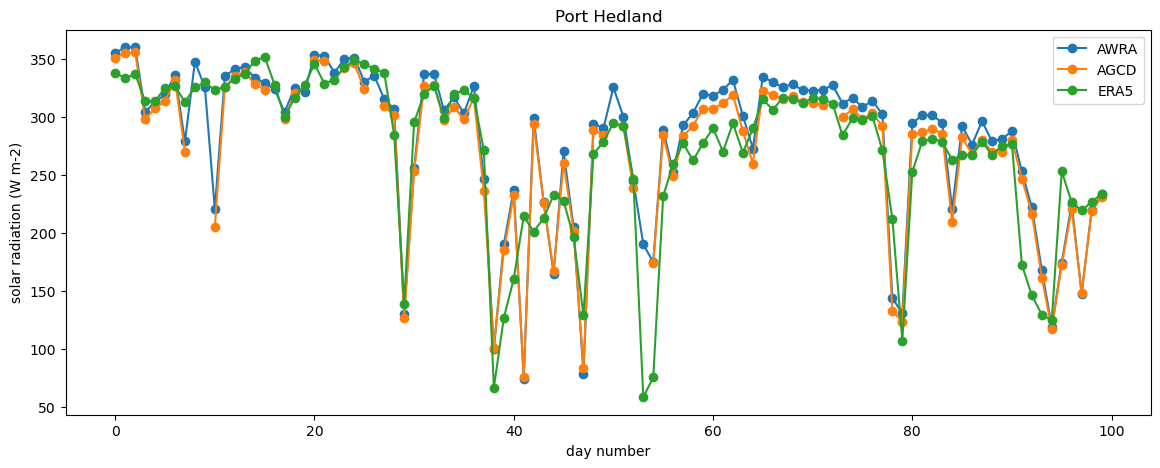

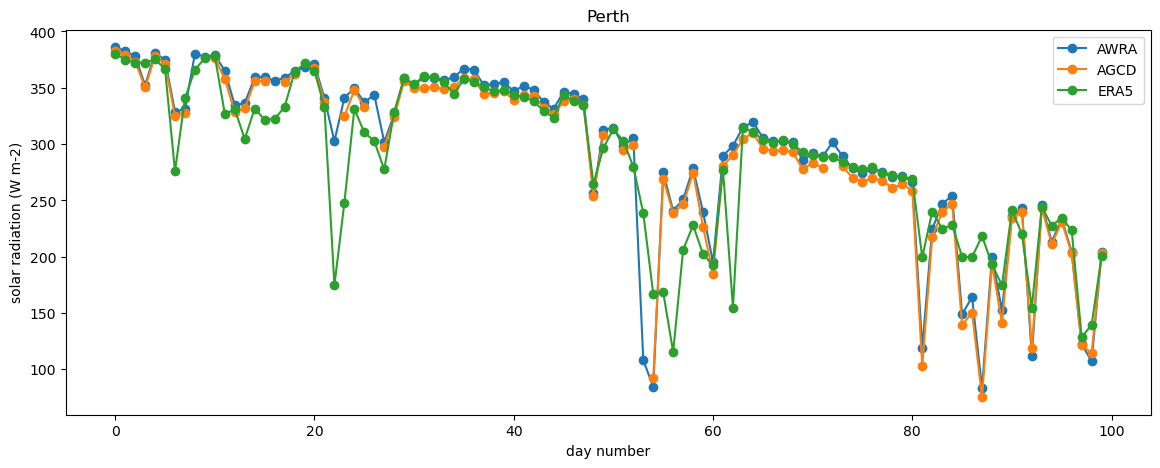

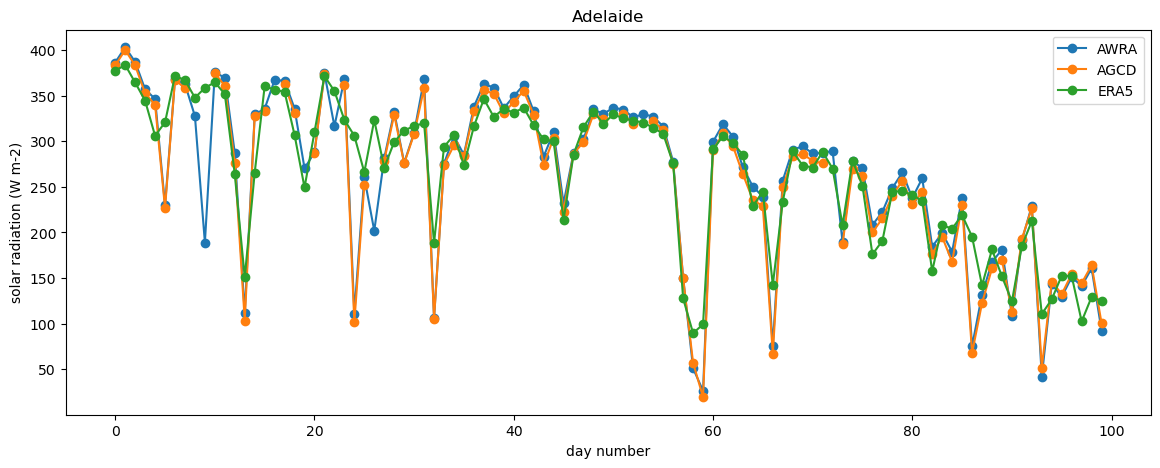

In [39]:
for city in city_lat_lon:
    da_awra, da_agcd, da_agcd_fixed, da_silo, da_era5 = get_point_data(city, 1995)
    fig = plt.figure(figsize=[14, 5])
    plt.plot(da_awra.values[0:100], marker='o', label='AWRA')
    #plt.plot(da_silo.values[0:100], marker='o', label='SILO')
    #plt.plot(da_agcd_fixed.values[0:100], marker='o', label='AGCD (fixed)')
    plt.plot(da_agcd.values[0:100], marker='o', label='AGCD')
    plt.plot(da_era5.values[0:100], marker='o', label='ERA5')
    plt.title(city)
    plt.ylabel('solar radiation (W m-2)')
    plt.xlabel('day number')
    plt.legend()
    plt.show()